## Instructions

We can skip the next cell if neural_de was installed from pip install.

In [1]:
import sys
# sys.path.append("..")
import time
print(sys.version)

3.9.21 | packaged by conda-forge | (main, Dec  5 2024, 13:51:40) 
[GCC 13.3.0]


Let's import from neural_de the rain removal method

In [2]:
from neural_de.transformations import DeRainEnhancer

2025-03-07 11:04:16.115057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-07 11:04:16.264544: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-07 11:04:16.298564: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-07 11:04:16.839348: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

We load an example image

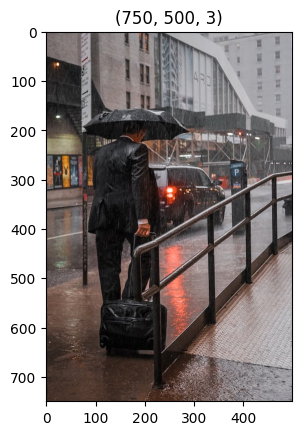

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import cv2
import os
start=time.time()
input_path = Path('../examples/images/street-rain-men.jpeg')
image = cv2.imread(str(input_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(image.shape)
plt.imshow(image)

## Enhancing an image

We create an instance of ResolutionShift :
- Please note that this method require an access to MinIO in order to retrieve model's weights (at least once, they will then be stored directly on the machine). Once the model is downloaded you can remove or comment the following cell.

In [4]:

shifter = DeRainEnhancer()

[03-07 11:04:18] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_twe_logger.py:123} INFO - Logger: name: neural_de_logger, handlers: [<StreamHandler stdout (DEBUG)>]
[03-07 11:04:18] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_derain_enhancer.py:54} INFO - Checking model availability...
[03-07 11:04:18] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/utils/_model_manager.py:58} INFO - Model already available locally, skipping download
[03-07 11:04:19] {/opt/conda/envs/env-neural39/lib/python3.9/site-packages/neural_de/transformations/_derain_enhancer.py:73} INFO - Trained model GT-rain loaded


We apply the transform method to any number of images. 
- we can have multiple images per call of transform, and call transform multiple time with the same shifter.
- for now, only ratio=2 is available for upsampling, as the underlaying transformer was trained for a 2x resolution.

In [5]:
derained_images = shifter.transform([image])


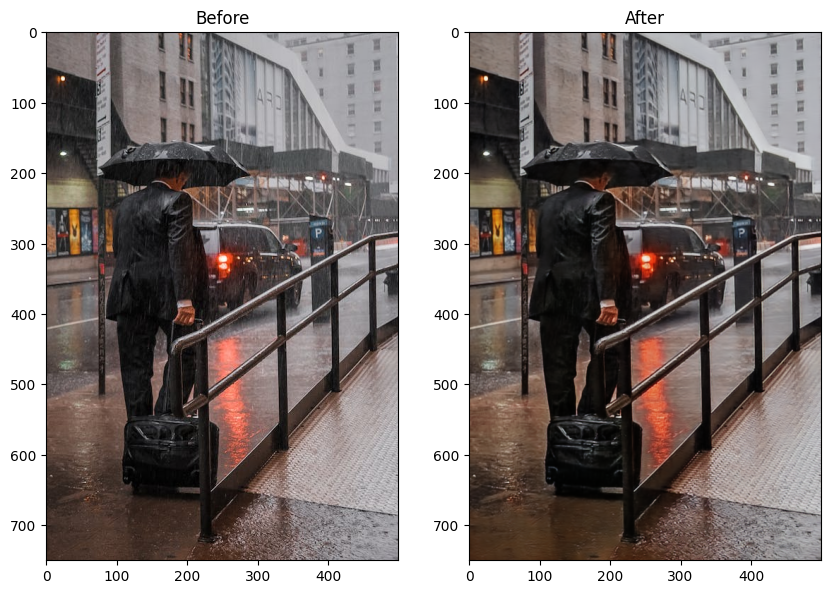

In [6]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Before")
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("After")
plt.imshow(derained_images[0])
plt.show()

In [7]:
end=time.time()
print("temps final : ",end-start)

temps final :  31.042988300323486
